# Computer Vision Project

### Importing Libraries

In [1]:
import pytesseract
import bottleneck as bn
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.misc import face
from scipy.signal.signaltools import wiener
from skimage import color, data, restoration
from scipy.signal import convolve2d as conv2
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

### Inputting raw images sample01 and sample02 to the ocr

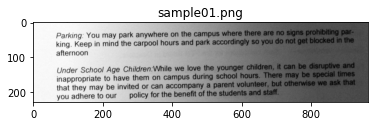

Parking: You may park anywhere on the cé
king. Keep in mind the carpool hours and park
afternoon

Under School Age Children:While we love
inappropriate to have them on campus @ J
that they may be invited or can accompany :
you adhere to our _ policy for the benefit of

 



In [2]:
sample01 = cv2.imread("sample01.png")
sample01 = cv2.cvtColor(sample01, cv2.COLOR_BGR2GRAY)

plt.imshow(sample01, cmap="gray")
plt.title('sample01.png')
plt.show()

print(pytesseract.image_to_string(sample01))

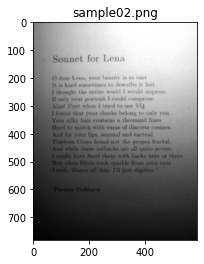

Sonnet for Lena

 



In [3]:
sample02 = cv2.imread("sample02.png")
sample02 = cv2.cvtColor(sample02, cv2.COLOR_BGR2GRAY)

plt.imshow(sample02, cmap="gray")
plt.title('sample02.png')
plt.show()

print(pytesseract.image_to_string(sample02))

### Implementing Otsu's Global Thresholding Algorithm

In [4]:
def otsu(image):
    res = image.copy()
    # Declaring number of bins for the histogram
    numbins = 256
    # Getting normalized histogram
    hist, bin_edges = np.histogram(image, bins=numbins)
    hist = hist.ravel()/hist.sum()
    # Calculating bin centers
    binctr = (bin_edges[:-1] + bin_edges[1:]) / 2.
    # Getting class probabilities w0(t), w1(t)
    w0, w1 = np.cumsum(hist), np.cumsum(hist[::-1])[::-1]
    # Getting class means mu0(t) & mu1(t)
    mu0, mu1 = np.cumsum(hist * binctr) / w0, (np.cumsum((hist * binctr)[::-1]) / w1[::-1])[::-1]
    # Maximizing inter-class variance
    varint = w0[:-1] * w1[1:] * (mu0[:-1] - mu1[1:]) ** 2
    maxval = np.argmax(varint)
    threshold = binctr[:-1][maxval]
    print(threshold)
    # Using the resulting threshold for the binarization
    res[res > threshold] = 255
    res[res <= threshold] = 0
    # Displaying resulting image
    plt.imshow(res, cmap="gray")
    plt.title('otsuresult')
    plt.show()
    return res

### Applying the algorithm to sample01 and feeding it to the ocr

125.314453125


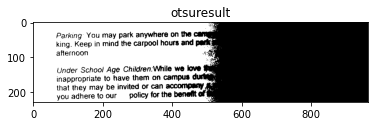

Parking You may park anywhere on the ct
king. Keep in mind the carpool hours and peri
afternoon

Under School Age Children:While we love
inappropriate to have them on campus @ .
that they may be invited or can accompany J
you adhere to our _policy for the benefit of

 



In [5]:
result = otsu(sample01)
cv2.imwrite('otsu01.jpg', result) 
print(pytesseract.image_to_string(result))

Obtained threshold:  125.0


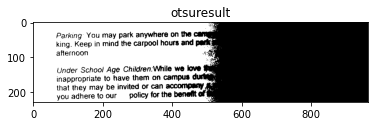

Parking You may park anywhere on the ct
king. Keep in mind the carpool hours and peri
afternoon

Under School Age Children:While we love
inappropriate to have them on campus @ .
that they may be invited or can accompany J
you adhere to our _policy for the benefit of

 



In [6]:
sample01thresh,sample01otsu = cv2.threshold(sample01,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Obtained threshold: ", sample01thresh)
plt.imshow(sample01otsu, cmap="gray")
plt.title('otsuresult')
plt.show()
print(pytesseract.image_to_string(sample01otsu))

### Applying the otsu algorithm to sample02 and feeding it to ocr

141.1875


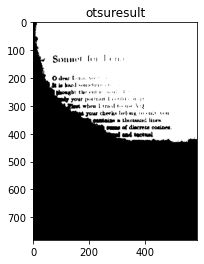

Sonnet for lens

 



In [7]:
result02 = otsu(sample02)
cv2.imwrite('otsu02.jpg', result02) 
print(pytesseract.image_to_string(result02))

Obtained threshold:  141.0


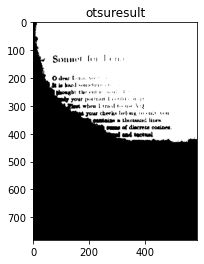

Sonnet for lens

 



In [8]:
sample02thresh,sample02otsu = cv2.threshold(sample02,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Obtained threshold: ", sample02thresh)
plt.imshow(sample02otsu, cmap="gray")
plt.title('otsuresult')
plt.show()
print(pytesseract.image_to_string(sample02otsu))

### I. Local Mean

In [9]:
def LocalMeanBinarization(im, w=7, c=2):
    treshim = im.copy()
    dim1 = treshim.shape[0]
    dim2 = treshim.shape[1]
    w = int(w/2)
    if(w <= 0):
        w = 1        
    for i in range(0, dim1):
        for j in range(0, dim2):
            il = i-w
            ir = i+w
            jl = j-w
            jr = j+w
            # Additional steps for image edges, if out of the image region, let the edge be the end of the window.
            if(il < 0):
                il = 0
            if(ir >= dim1):
                ir = dim1 - 1
            if(jl < 0):
                jl = 0
            if(jr >= dim2):
                jr = dim2 - 1
            win = im[il:ir, jl:jr]        

            t = np.mean(win) - c 
            treshim[i, j] = t        
    img = im.copy()
    img[img <= treshim] = 0
    img[img > treshim] = 255 
    img[:, 0:1] = 255
    img[:, -1:] = 255
    img[0:1, :] = 255
    img[-1:, :] = 255        
    return img

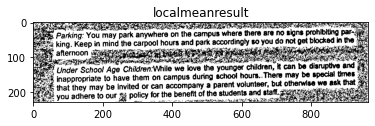

   

: EDIE ERED AS Soe RAD cad cis DRE tetas aioe aNd Peed
Parking: You may park anywhere on the campus where there are no signs prohibiting par-;
pool hours and park accordingly 80 you do not get blocked in the

    
  
 
 

wen
Under School Age Children:While we love the younger Children, can be disruptive and
inappropriate to have them on campus during school hours.: There may be special time:
© that they may be invited or can accompany a parent volunteer, but otherwise we ask that
‘a you adhere to our 43 policy for the benefit of the students and staff. seer

pao! Wook
sah ing pov ines epee BR

   



In [10]:
sample01 = cv2.imread("sample01.png")
sample01 = cv2.cvtColor(sample01, cv2.COLOR_BGR2GRAY)
result = LocalMeanBinarization(sample01, 21, 0)
cv2.imwrite('LocalMean01.jpg', result) 
plt.imshow(result, cmap="gray")
plt.title('localmeanresult')
plt.show()
print(pytesseract.image_to_string(result))

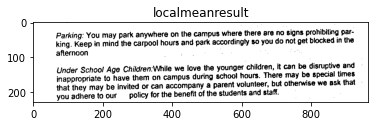

Parking: You may park anywhere on the campus where there are no signs prohibiting par-
king. Keep in mind the carpool hours and park accordingly so you do not get blocked in the
afternoon

Under Schoo! Age Children:While we love the younger children, it can be disruptive and
inappropriate to have them on campus during schoo! hours. There may be special times
that they may be invited or can accompany a parent volunteer, but otherwise we ask that
you adhere to our — policy for the benefit of the students and staff.



In [11]:
sample01 = cv2.imread("sample01.png")
sample01 = cv2.cvtColor(sample01, cv2.COLOR_BGR2GRAY)
result = LocalMeanBinarization(sample01, 21, 7.5)
cv2.imwrite('LocalMean01.jpg', result) 
plt.imshow(result, cmap="gray")
plt.title('localmeanresult')
plt.show()
print(pytesseract.image_to_string(result))

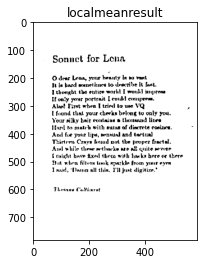

Sonnet for Lena

O dear Lena, your heauty Is eo rant

It is bard sousetines to describe it Enat.
Tthonght the entire world [ would jmprena
If only your portrait [ roukd comprens,

Alas! First when 1 tried Lo use YQ

L found that your checks belong to only you,
Your silky hait contaion a thonsand lines
{lard to match with mina of discrete cosines.
Aod for your Lips, sensual and tartual
Thidtren Craya fru oot the proper frectel,
And while thear setbacks are all quite evere
Tenight have diced thom with hicks here or there
Bat whe Alteta logk eparkle from your eves
Taal, Dann all this, DIE just digitize.”

Thinnes Caltinrat



In [12]:
sample02 = cv2.imread("sample02.png")
sample02 = cv2.cvtColor(sample02, cv2.COLOR_BGR2GRAY)
result = LocalMeanBinarization(sample02, 19, 6.5)
cv2.imwrite('LocalMean02.jpg', result) 
plt.imshow(result, cmap="gray")
plt.title('localmeanresult')
plt.show()
print(pytesseract.image_to_string(result))

### II. Sauvola

In [13]:
def SauvolaBinarization(im, w, k=0.2):
    treshim = im.copy()
    dim1 = treshim.shape[0]
    dim2 = treshim.shape[1]
    w = int(w/2)
    if(w <= 0):
        w = 1
    for i in range(0, dim1):
        for j in range(0, dim2):
            il = i-w
            ir = i+w
            jl = j-w
            jr = j+w
            # Additional steps for image edges, if out of the image region, let the edge be the end of the window.
            if(il < 0):
                il = 0
            if(ir >= dim1):
                ir = dim1 - 1
            if(jl < 0):
                jl = 0
            if(jr >= dim2):
                jr = dim2 - 1
            win = im[il:ir, jl:jr]        
            
            t = (np.mean(win) * (1-k*(1-(np.std(win)/128))))       
            treshim[i, j] = t        
    img = im.copy()
    img[img <= treshim] = 0
    img[img > treshim] = 255
    img[:, 0:1] = 255
    img[:, -1:] = 255
    img[0:1, :] = 255
    img[-1:, :] = 255        
    return img

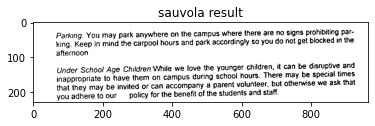

Parking: You may park anywhere on the campus where there are no signs prohibiting par-
king. Keep in mind the carpool hours and park accordingly so you do not get blocked in the
afternoon

Under School Age Children:While we love the younger children, it can be disruptive and
inappropriate to have them on campus during school hours. There may be special times
that they may be invited or can accompany a parent volunteer, but otherwise we ask that
you adhere to our —_policy for the benefit of the students and staff.



In [14]:
sample01 = cv2.imread("sample01.png")
sample01 = cv2.cvtColor(sample01, cv2.COLOR_BGR2GRAY)
result = SauvolaBinarization(sample01, 17, 0.25)
cv2.imwrite('Sauvola01.jpg', result) 
plt.imshow(result, cmap="gray")
plt.title('sauvola result')
plt.show()
print(pytesseract.image_to_string(result))

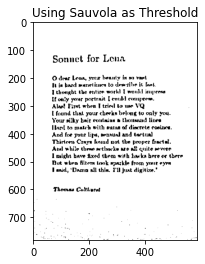

Sonnet for Lena

© deer Leua, your beauty ia eo east

Te in bard sanet ines to cleseribe it fant.
Tthonght the entire world T wandd impress
If only your portrait [ raukd compress,

Alas! Firat when 7 trie) bo nee VQ

[found that your checks belong to only you.
Your silky bait contaion a thonand lines
Ilant to match with mits of discrete cosines.
And for your lips, sensual and tactual
Thirties Crays found not the proper fractal,
And while these pctbacks are all quite severe
LT might bave fixed them with hacks bere of there
But when filtera Look sparkle from your even
Daaid, ‘Damo all thin. I'll fuxt digitize."

Thomas Colthvest



In [15]:
sample02 = cv2.imread("sample02.png")
sample02 = cv2.cvtColor(sample02, cv2.COLOR_BGR2GRAY)
result = SauvolaBinarization(sample02, 19, 0.055)
cv2.imwrite('Sauvola02.jpg', result) 
plt.imshow(result, cmap="gray")
plt.title('Using Sauvola as Threshold')
plt.show()
print(pytesseract.image_to_string(result))               

### III. Denoising + Dilation

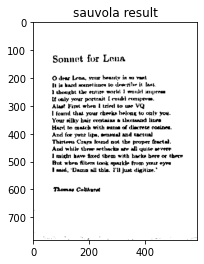

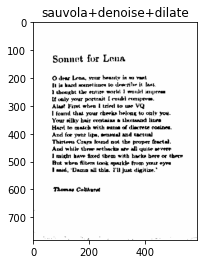

sauvola OCR:
Sonnet for Lena

© dear Lena, voor beauty in eo reat

Ti is bard sometimes bo cleacribe it fant,

D thought Ube entire world 1 would impress
Uf oniy your portrait [ coukd compres.

Alas! First when 1 tried uo une VQ

| found that your checks belong to only you.
Your silky hair contaion a thunsard lines
Hard to match with mits of discrete cosines.
And for your Lips, senedal and eactuad
Thirterts Craya found not the proper fractal.
And while three eetbacte ape all quite etvere
T might have fixed them with hacks bere or there
But when filters Look sparkle from your eyea
Desi, ‘Datno all thie. 1'll just digitize.”

Thomas Cothurst

sauvola+denoised+dilated OCR:
Sonnet for Lena

© dear Lena, your beauty in eo reat

Ti is bard sometimes bo cleacribe it sat,
Dthought Ube entire world 1 would impress
Uf oniy your portrait [ coukd compres,

Alas! First when 1 tried to use VQ

| found that your checks belong to only you.
Your silky hair contaion a bhunsaed lines
Hard to match with 

In [16]:
sample02 = cv2.imread("sample02.png")
result = SauvolaBinarization(sample02, 37, 0.08)
denoised = cv2.fastNlMeansDenoisingColored(result,None,3,3,5,11)
kernel = np.ones((1,1), np.uint8)
dilated = cv2.dilate(denoised, kernel, iterations=1)
cv2.imwrite('dilated.jpg', dilated) 
plt.imshow(result, cmap="gray")
plt.title('sauvola result')
plt.show()
plt.imshow(denoised, cmap="gray")
plt.title('sauvola+denoise+dilate')
plt.show()
print("sauvola OCR:")
print(pytesseract.image_to_string(result))  
print("sauvola+denoised+dilated OCR:")
print(pytesseract.image_to_string(dilated))    



### IV. Richardson Lucy Restoration

In [17]:
sample02 = cv2.imread("sample02.png")
sample02 = cv2.cvtColor(sample02, cv2.COLOR_BGR2GRAY)
psf = np.ones((3, 3)) / 7
sample02= sample02.astype(float)
sample02noisy = sample02.copy()
sample02noisy += (np.random.poisson(lam=25, size=sample02.shape) - 10) / 255
sample02noisy = sample02noisy/255
deconvolved_RL = restoration.richardson_lucy(sample02noisy, psf, iterations=30)

In [18]:
c = (255*(deconvolved_RL - np.min(deconvolved_RL))/np.ptp(deconvolved_RL)).astype(int)   
cv2.imwrite('deconvolved.jpg', c) 

True

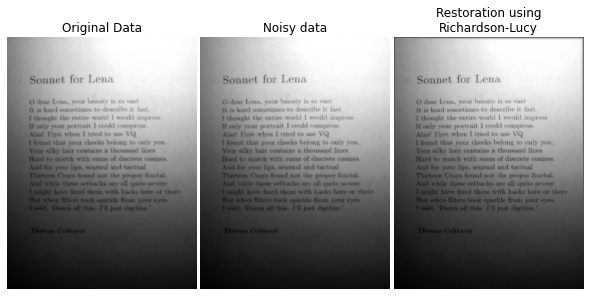

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(sample02)
ax[0].set_title('Original Data')

ax[1].imshow(sample02noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=sample02noisy.min(), vmax=sample02noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

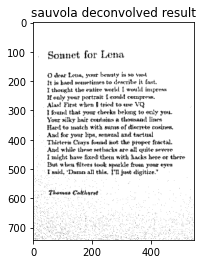

In [20]:
deconvolved_RL =deconvolved_RL[20:-20,20:-20]
result = SauvolaBinarization(deconvolved_RL, 17, 0.075)
plt.imshow(result, cmap="gray")
plt.title('sauvola deconvolved result')
plt.show()

In [21]:
result = result.astype(np.uint8)
print(pytesseract.image_to_string(result))  

Sonnet for Lona

Oidear Lena, gout hearty is ob yest

tt ds basd sonectinees to describe Hi fast,
Tthoight the entice world | fd feerpress
if only your portrait Ceoubl compress,

Alest First when | ined te use VQ

I founcl that your cheeks belong te enly pot.
Your silky hair eoitehas @ dhettsandd lies
Hard te match with sums of dlserete cosines,
Aad for your ipa, senetal and tertual
Thirterte Clays found not the proper fractal,
Atel while thean setbacks are all quite severe
T might have fixed them with hacks here op there
But whe filters took sparkle Bien your apex
Tsai, ‘Derore all thle, [TL just cligitize.”

 
 

 

Thomas Coltherst

  



### V. Romen Singh 

In [22]:
def NewBinarization(im, w, k):
    treshim = im.copy()
    dim1 = treshim.shape[0]
    dim2 = treshim.shape[1]
    w = int(w/2)
    if(w <= 0):
        w = 1
    for i in range(0, dim1):
        for j in range(0, dim2):
            il = i-w
            ir = i+w
            jl = j-w
            jr = j+w
            # Additional steps for image edges, if out of the image region, let the edge be the end of the window.
            if(il < 0):
                il = 0
            if(ir >= dim1):
                ir = dim1 - 1
            if(jl < 0):
                jl = 0
            if(jr >= dim2):
                jr = dim2 - 1
            win = im[il:ir, jl:jr]    
            mw = np.mean(win)
            sw = np.std(win)
            md = np.mean(win - np.mean(win))
            if (1-md) == 0:
                md = md+0.1
            t = mw*(1+k*((md/(1-md))-1))
            treshim[i, j] = t        
    img = im.copy()
    img[img <= treshim] = 0
    img[img > treshim] = 255
    img[:, 0:1] = 255
    img[:, -1:] = 255
    img[0:1, :] = 255
    img[-1:, :] = 255        
    return img

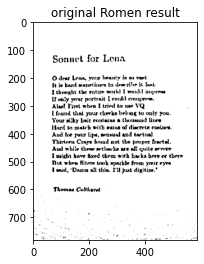

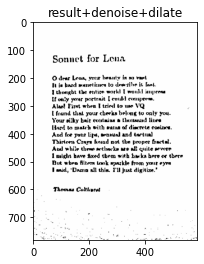

Romen OCR:
Sonnet for Lena

O deer Leua, your hesuty ia so east

Tt ia bard soietines to describe it fant,
Tthonght the entire world T would impress
If only your portrait [ could comprenn,

Alas! Firat when 7 tried to uee VQ

L found that your checks belong to only you.
Your ailky bait contains a thensand lines
Hart to match with summa of discrete cosines.
And for your lips, sensual and tartual
Thiricen Crays found not the proper fractal,
Aad while theve pcthacka are all quite severe
LT might bave fixed them with hacks bere or there
But when filters Look sparkle from your even
Dani, ‘Damo all thin, I'll just digitize.”

Thomas Cotthurst

   

Romen+denoised+dilated OCR:
Sonnet for Lena

O deer Leua, your hesuty ia eo east

Te ia bard snoietines to describe it fant,
Tthonght the entire world T would impress
Lf only your portrait [ could comprens,

Alas! Firat when 7 tried to uee VQ

LE found that your checks belong to only you.
Your ailky bait contains a thonsnnd lines
Hart to match wi

In [23]:
sample02 = cv2.imread("sample02.png")
result = NewBinarization(sample02, 21, 0.05)
denoised = cv2.fastNlMeansDenoisingColored(result,None,3,3,5,11)
kernel = np.ones((1,1), np.uint8)
dilated = cv2.dilate(denoised, kernel, iterations=1)
cv2.imwrite('romen.jpg', dilated) 
plt.imshow(result, cmap="gray")
plt.title('original Romen result')
plt.show()
plt.imshow(denoised, cmap="gray")
plt.title('result+denoise+dilate')
plt.show()
print("Romen OCR:")
print(pytesseract.image_to_string(result))  
print("Romen+denoised+dilated OCR:")
print(pytesseract.image_to_string(dilated))  
